## Makine Öğrenmesi Dersleri-1: Açıklayıcı Veri Analizi


Veri biliminde öngörülen 2018 trendlerini paylaştığım ilk yazımdan sonra makine öğrenmesi dersleri ile ilgili başlangıç-orta düzeyde bir seri yapmaya karar verdim.

Çünkü bu alanla ilgili standart ders kitapları kişiyi fazla teknik detaya boğduğundan ya ilk ünite bitmeden “bu iş bana göre değil bunu gugıldaki, feysbuktaki, tivitırdaki adamlar anca anlar” deyip aşağılık kompleksine giriyoruz ya da youtube videolarının arka arkası gelmeyen pasifliğinde oradan oraya savruluyoruz. Günün sonunda big data, machine learning, deep learning, artificial intelligence diyen ama basit bir karar ağacı modeli kuramayan meraklılar haline dönüşüyoruz.

O sebeple makine öğrenmesi derslerini elimden geldiğince basit olarak kurguladım. Daha da önemlisi bu dersi takip etmek için bilgisayarınıza Python kurmanıza veya veri setini indirmenize de gerek yok. İhtiyacınız olan tek şey internet ve bu yazıyı okuduğunuza göre o konuda da bir sorunumuz yok.
- Google hesabınızı açın.
- https://colab.research.google.com/ adresine gidin.
- NEW PYTHON 3 NOTEBOOK'a tıklayın.
- Oradaki satıra aşağıdaki kodu yapıştırın.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/aciklayici_veri_analizi/data/adult.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Yukarıdaki gibi bir sonuç çıkmış olmalı. Şimdi kütüphanelerimizi çağıralım.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

Şimdi sütunları ekleyip veri setimize tekrar bakıyoruz. Her şey yolunda gözüküyor.

In [3]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


İlk yapmamız gereken veri setimizde eksik veri olup olmadığını ve veri tiplerini kontrol etmek. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Yukarıda göreceğiniz gibi her sütunda 32.561 'non-null' kayıt var yani veri setimizde eksik veri yok. Sütunların yanında veri tiplerini de görüyorsunuz. Burada hedef değişkenimiz salary olduğu için onun dağılımına value_counts() fonksiyonuyla bakıyoruz ve seaborn kütüphanesiyle görselleştiriyoruz. 

Adımlarımız sırasıyla şöyle:

1. plt.figure() ile görselin enini ve boyunu belirliyoruz.
2. sns.countplot() fonksiyonuna görselleştirmek istediğim değişkeni yazıyoruz.
3. value_counts() fonksiyonuyla hedef değişkenin dağılımını buluyoruz.

Salary Distribution:


 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

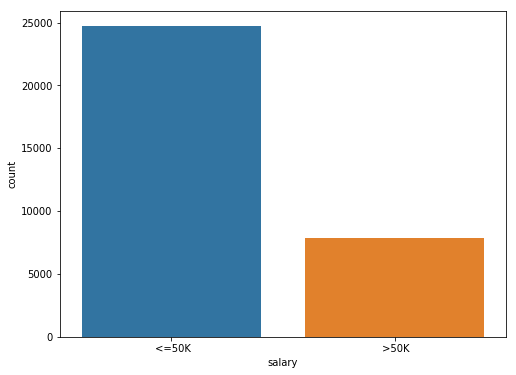

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(df['salary'])
print('Salary Distribution:')
df['salary'].value_counts()

Maaşı 50K'dan düşük ve yüksek olanların yaş karakteristiğine bakalım şimdi de. 

Adımlarımız sırasıyla şöyle:

1. Öncelikle df['salary'] sütunun <=50K'ya eşit olduklarını seçiyoruz.
2. Bu şartı sağlayan kayıtların ['age'] sütununa bakıyoruz.
3. describe() fonksiyonuyla bu şartı sağlayan kayıtların ['age'] sütunuyla ilgili dağılımnı elde ediyoruz.
4. Aynı işlemleri  df['salary'] sütunun >50K'ya eşit olduğu sütunlar için de tekrarlıyoruz.

In [6]:
print("Maaşı 50K'dan düşük olanların yaş karakteristiği:")
print(df[df['salary'] == ' <=50K'].age.describe())
print('')
print("Maaşı 50K'dan yüksek olanların yaş karakteristiği:")
print(df[df['salary'] == ' >50K'].age.describe())

Maaşı 50K'dan düşük olanların yaş karakteristiği:
count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

Maaşı 50K'dan yüksek olanların yaş karakteristiği:
count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64


Bu kısım biraz karışık gelebilir değerlerle oynayıp hata almanızı tavsiye ederim ama çok da takılmanıza gerek yok artık görselleştirme dünyasına giriyoruz. Veri setindeki kişilerin eğitim durumlarının dağılımını yine value_counts() fonksiyonuyla buluyoruz, yukarıdaki görsele ek olarak x eksenindeki değişkenlerimizi büyükten küçüğe sıralamak istediğimiz için order belirliyoruz ve x eksenimiz iç içe geçmesin diye değerleri 70 derece döndürüyoruz.

Adımlarımız sırasıyla şöyle:

1. plt.figure() ile görselin enini ve boyunu belirliyoruz.
2. sns.countplot() fonksiyonuna görselleştirmek istediğim değişkeni yazıyoruz ve hedef değişkeni büyükten küçüğe sıralıyoruz.
3. x eksenini 70 derece döndürüyoruz ki değerler birbirine karışmasın.
4. value_counts() fonksiyonuyla hedef değişkenin dağılımını buluyoruz.

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

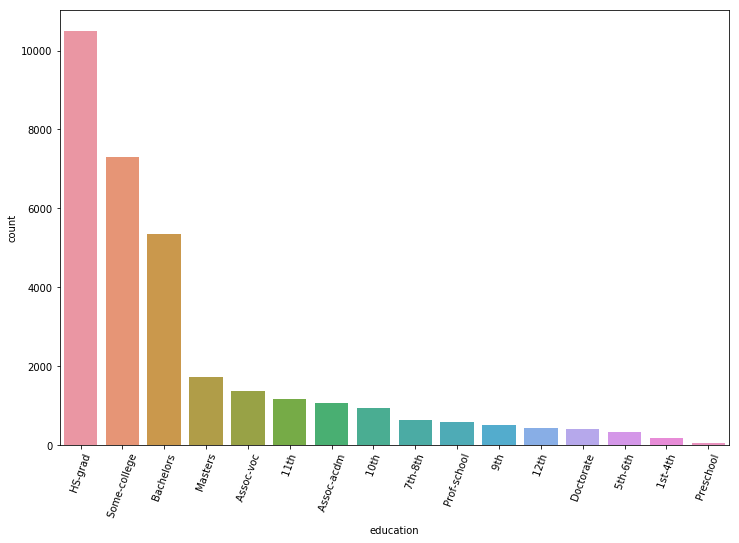

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(df['education'], order = df['education'].value_counts().index)
plt.xticks(rotation=70)
df['education'].value_counts()

Yukarıda iki değer alabilen bir özniteliğin yaş karakteristiğini incelemiştik. Eğer bu çalışmayı eğitim gibi çok fazla değer alan bir öznitelik için yapmaya kalkarsak oldukça zaman kaybederiz. Bunun için groupby() fonksiyonuna ihtiyacımız var. 

Adımlarımız sırasıyla şöyle:

1. Gruplamak istediğimiz değişkeni belirliyoruz.
2. İncelemek istediğimiz sütunu seçiyoruz.
3. describe() fonksiyonuyla hedef değişkenimizin dağılımını buluyoruz.


In [8]:
df.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


Şimdi de eğitim durumuna göre insanların haftalık ortalama çalışma saatlerini inceleyeceğiz. Bunu yaparken ayrıca 50K'dan az ve fazla alan kişileri de gruplayıp dağılımı öğreneceğiz.

Adımlarımız sırasıyla şöyle:

1. plt.figure() ile görselin enini ve boyunu belirliyoruz.
2. sns.barplot() fonksiyonuna görselleştirmek istediğimiz değişkenin x ve y değerlerini yazıyoruz.
3. hue='salary' seçeneği ile veriyi 'salary' sütununa göre ikiye ayırıyoruz.
4. default renk seçeneği yerine palette='inferno' ile görselleştiriyoruz.
5. x eksenini 70 derece döndürüyoruz ki değerler birbirine karışmasın.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

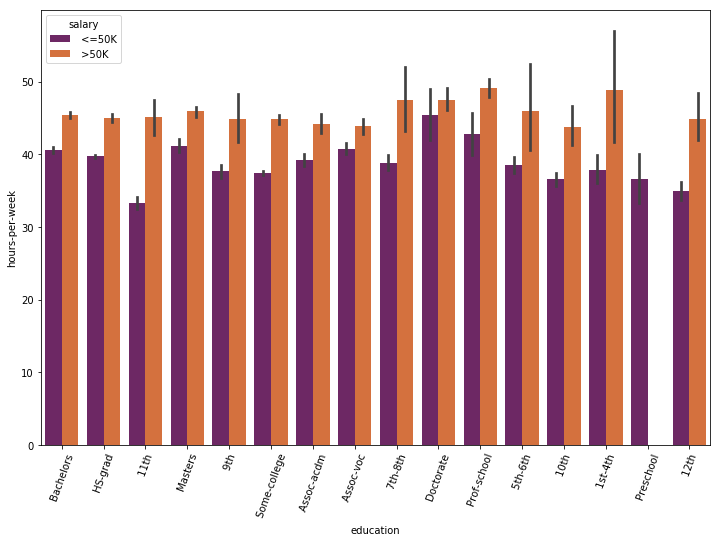

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x="education", y="hours-per-week", data=df, hue="salary", palette='inferno')
plt.xticks(rotation=70)

Şimdi de verimizi cinsiyete göre gruplayıp insanların haftalık ortalama çalışma saatlerini inceleyeceğiz. 

Adımlarımız sırasıyla şöyle:

1. plt.figure() ile görselin enini ve boyunu belirliyoruz.
2. sns.pointplot() fonksiyonuna görselleştirmek istediğimiz değişkenin x ve y değerlerini yazıyoruz.
3. hue='sex' seçeneği ile veriyi sex' sütununa göre ikiye ayırıyoruz.
4. default renk seçeneği yerine palette='dark' ile görselleştiriyoruz.
5. x eksenini 70 derece döndürüyoruz ki değerler birbirine karışmasın.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

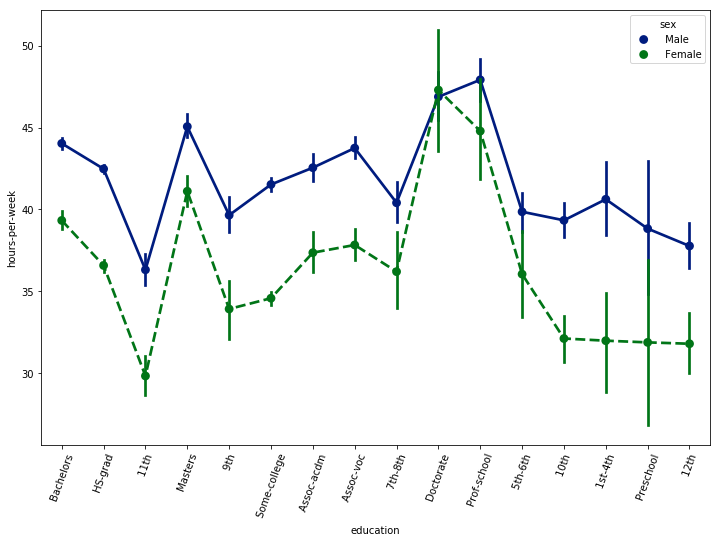

In [10]:
plt.figure(figsize=(12,8))
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", linestyles=["-", "--"], data=df)
plt.xticks(rotation=70)

Son olarak yukarıdaki yaptığımız maaş ve cinsiyet gruplamalarını birleştiriyoruz ve buna göre insanların haftalık ortalama çalışma saatlerini inceliyoruz.

Adımlarımız sırasıyla şöyle:

1. plt.subplots() ile görselin enini, boyunu belirliyoruz ve satır, sütun sayısını belirliyoruz.
2. sns.pointplot() fonksiyonuna görselleştirmek istediğimiz değişkenin x ve y değerlerini yazıyoruz.
3. hue='sex' seçeneği ile veriyi 'sex' sütununa göre ikiye ayırıyoruz.
4. default renk seçeneği yerine palette='dark' ile görselleştiriyoruz.
5. data=df[df['salary']==' <=50K'] ile maaşı 50K'dan az olanları seçiyoruz.
6. ax=ax1 ile ilk figürün yerini belirliyoruz.
7. Aynı adımları maaşı 50K'dan fazla olanlar için tekrarlıyoruz.

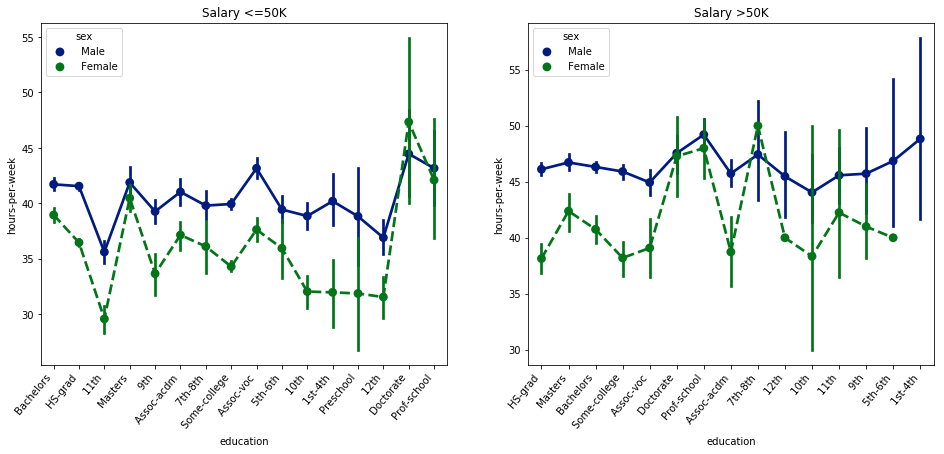

In [11]:
f, (ax1, ax2) =plt.subplots(1,2,figsize=(16,7))
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", linestyles=["-", "--"], data=df[df['salary']==' <=50K'], ax=ax1)
ax1.set_title('Salary <=50K')
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", linestyles=["-", "--"], data=df[df['salary']==' >50K'], ax=ax2)
ax2.set_title('Salary >50K')
f.autofmt_xdate(rotation=50)

İlk ders Python’a veya başka bir programlama diline hakim olan insanlar için kolay gelebilir. Onlar için hızlı bir tekrar olmuştur umarım, derslerin zorluğu her hafta artacak aman rehavete kapılmayın. İlk defa programlamaya giriş yapanlar için de keyifli bir başlangıç olmuştur umarım.

Tekrara boğmadan elimden geldiğince basit yazmaya çalıştım ama açık olmayan kısımlar olabilir, bana yazarsanız gerekli eklemeleri düzenlemeleri yaparım.

İkinci derse kadar herkesin bu çalışmayı kendi bilgisayarında denemesini tavsiye ederim. Emin olun bilgisayarınızda yapıp düzelteceğiniz 1 hata, buna benzer 20 yazı okuyup 15 video izlemekten çok daha faydalı olacaktır.

Çalışmadaki veri setine kodlara şuradan ulaşabilirsiniz.

https://github.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/tree/master/aciklayici_veri_analizi

Bitirmeden Josh Wills’in veri bilimcisi tanımını da sizinle paylaşayım.

## Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.